In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




%matplotlib inline

In [2]:
california_dataset = fetch_california_housing()
type(california_dataset)

sklearn.utils.Bunch

In [3]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print("DIR: ",dir(california_dataset))
print("Feature Names: ",california_dataset.feature_names)
print("Data: " ,california_dataset.data)
print("Target: " ,california_dataset.target) #price of houses in 100,000s 
print("Target Names: " ,california_dataset.target_names)

DIR:  ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
Feature Names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Data:  [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Target:  [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target Names:  ['MedHouseVal']


# Pandas Dataframe

In [5]:
df = pd.DataFrame(data=california_dataset.data, columns=california_dataset.feature_names)
df["Price"] = california_dataset.target
print(df.head(5))
print("\n\nTotal Rows:\n" ,df.count())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


Total Rows:
 MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
Price         20640
dtype: int64


# Cleaning Data

In [6]:
df.info()
# No missing values in any column, therefore, no cleaning required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visualising Data

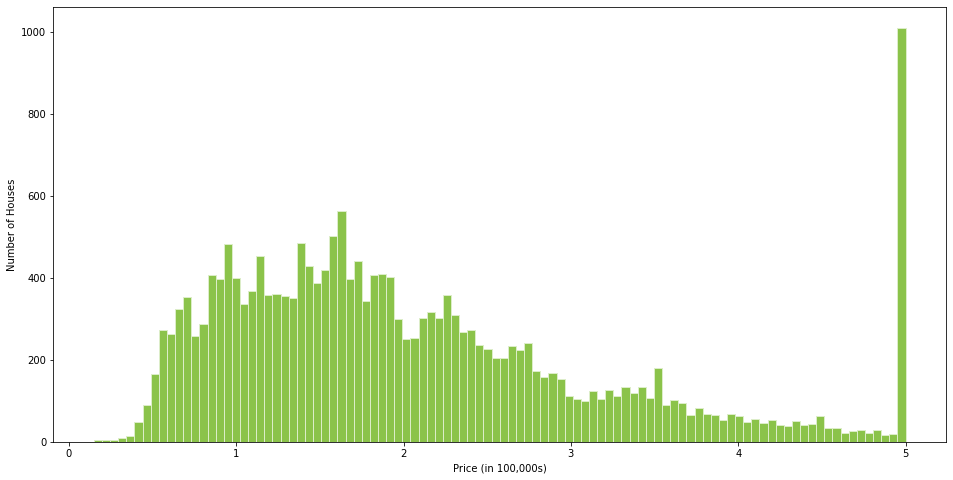

In [7]:
plt.figure(figsize=(16, 8))
plt.hist(df["Price"], ec="#DCEDC8", color="#8BC34A", bins=100)
plt.xlabel("Price (in 100,000s)")
plt.ylabel("Number of Houses")
plt.show()

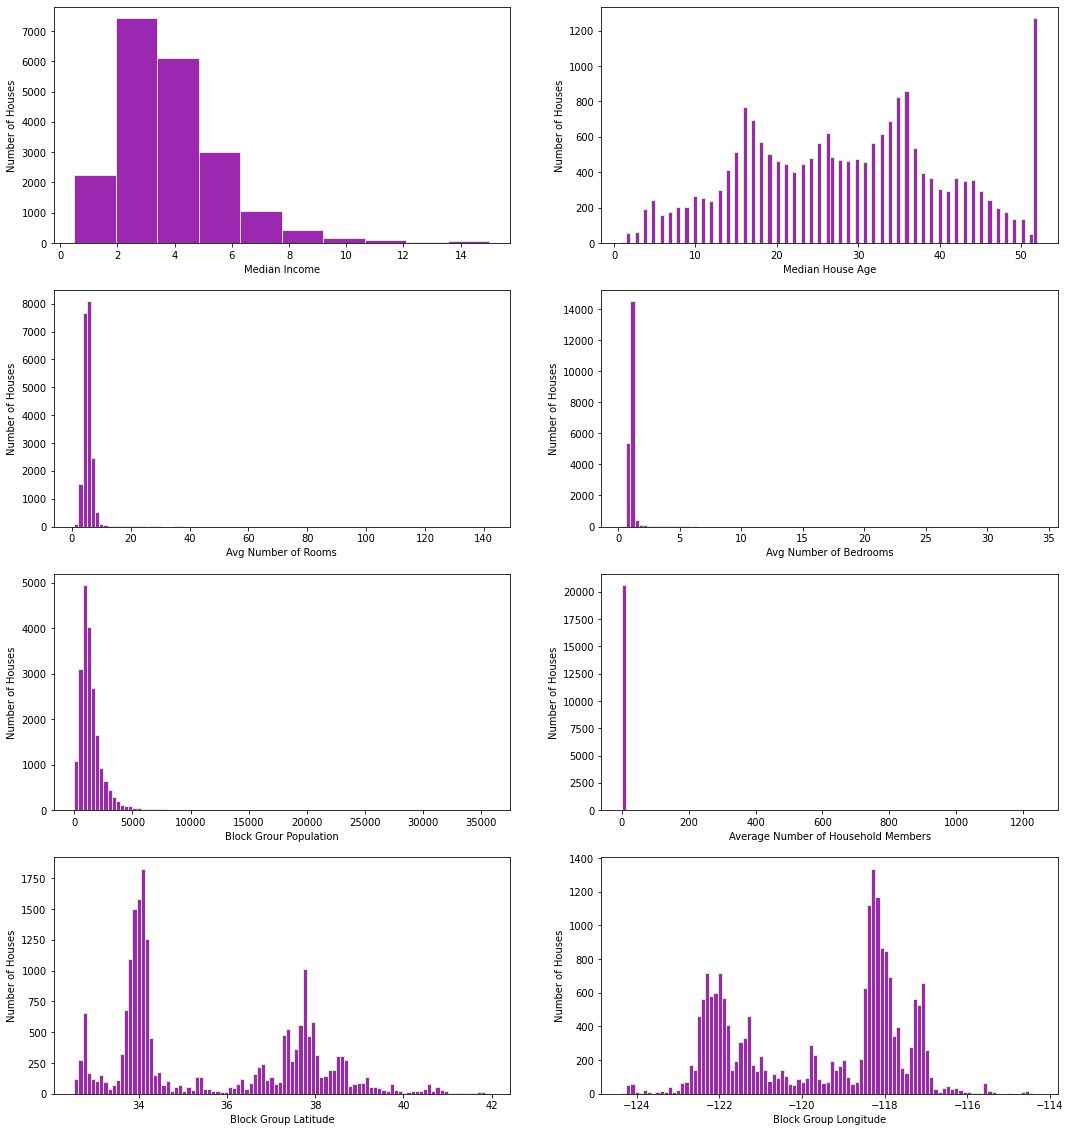

In [8]:
plt.figure(figsize=(18, 20))

plt.subplot(4,2,1)
plt.hist(df["MedInc"], ec="#DCEDC8", color="#9C27B0", bins=10)
plt.xlabel("Median Income")
plt.ylabel("Number of Houses")
# plt.show()

plt.subplot(4,2,2)
plt.hist(df["HouseAge"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Median House Age")
plt.ylabel("Number of Houses")

plt.subplot(4,2,3)
plt.hist(df["AveRooms"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Avg Number of Rooms")
plt.ylabel("Number of Houses")

plt.subplot(4,2,4)
plt.hist(df["AveBedrms"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Avg Number of Bedrooms")
plt.ylabel("Number of Houses")

plt.subplot(4,2,5)
plt.hist(df["Population"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Block Grour Population")
plt.ylabel("Number of Houses")

plt.subplot(4,2,6)
plt.hist(df["AveOccup"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Average Number of Household Members")
plt.ylabel("Number of Houses")

plt.subplot(4,2,7)
plt.hist(df["Latitude"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Block Group Latitude")
plt.ylabel("Number of Houses")

plt.subplot(4,2,8)
plt.hist(df["Longitude"], ec="#DCEDC8", color="#9C27B0", bins=100)
plt.xlabel("Block Group Longitude")
plt.ylabel("Number of Houses")


plt.show()

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

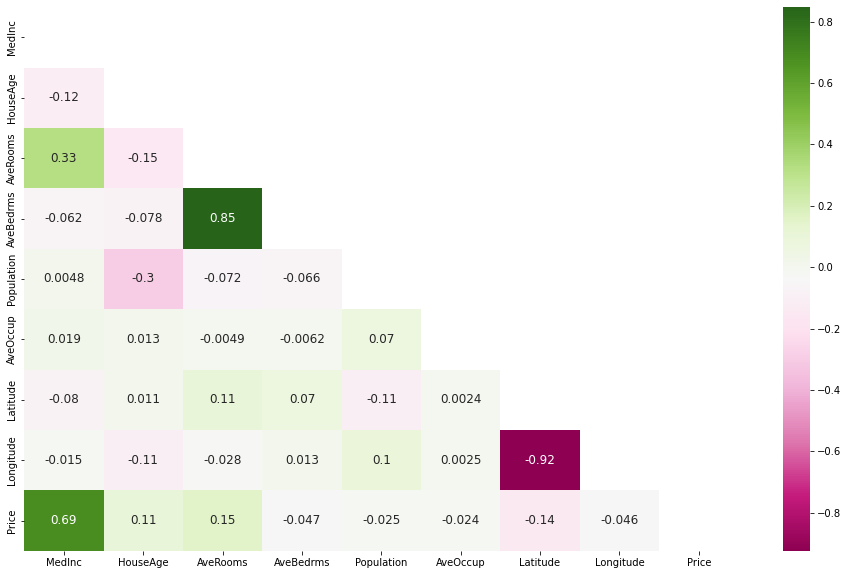

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="PiYG", mask=mask, annot=True, annot_kws={"size": 12})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
min(0.69, 0.11, 0.15, 0.047, 0.025, 0.024, 0.14, 0.046)

0.024

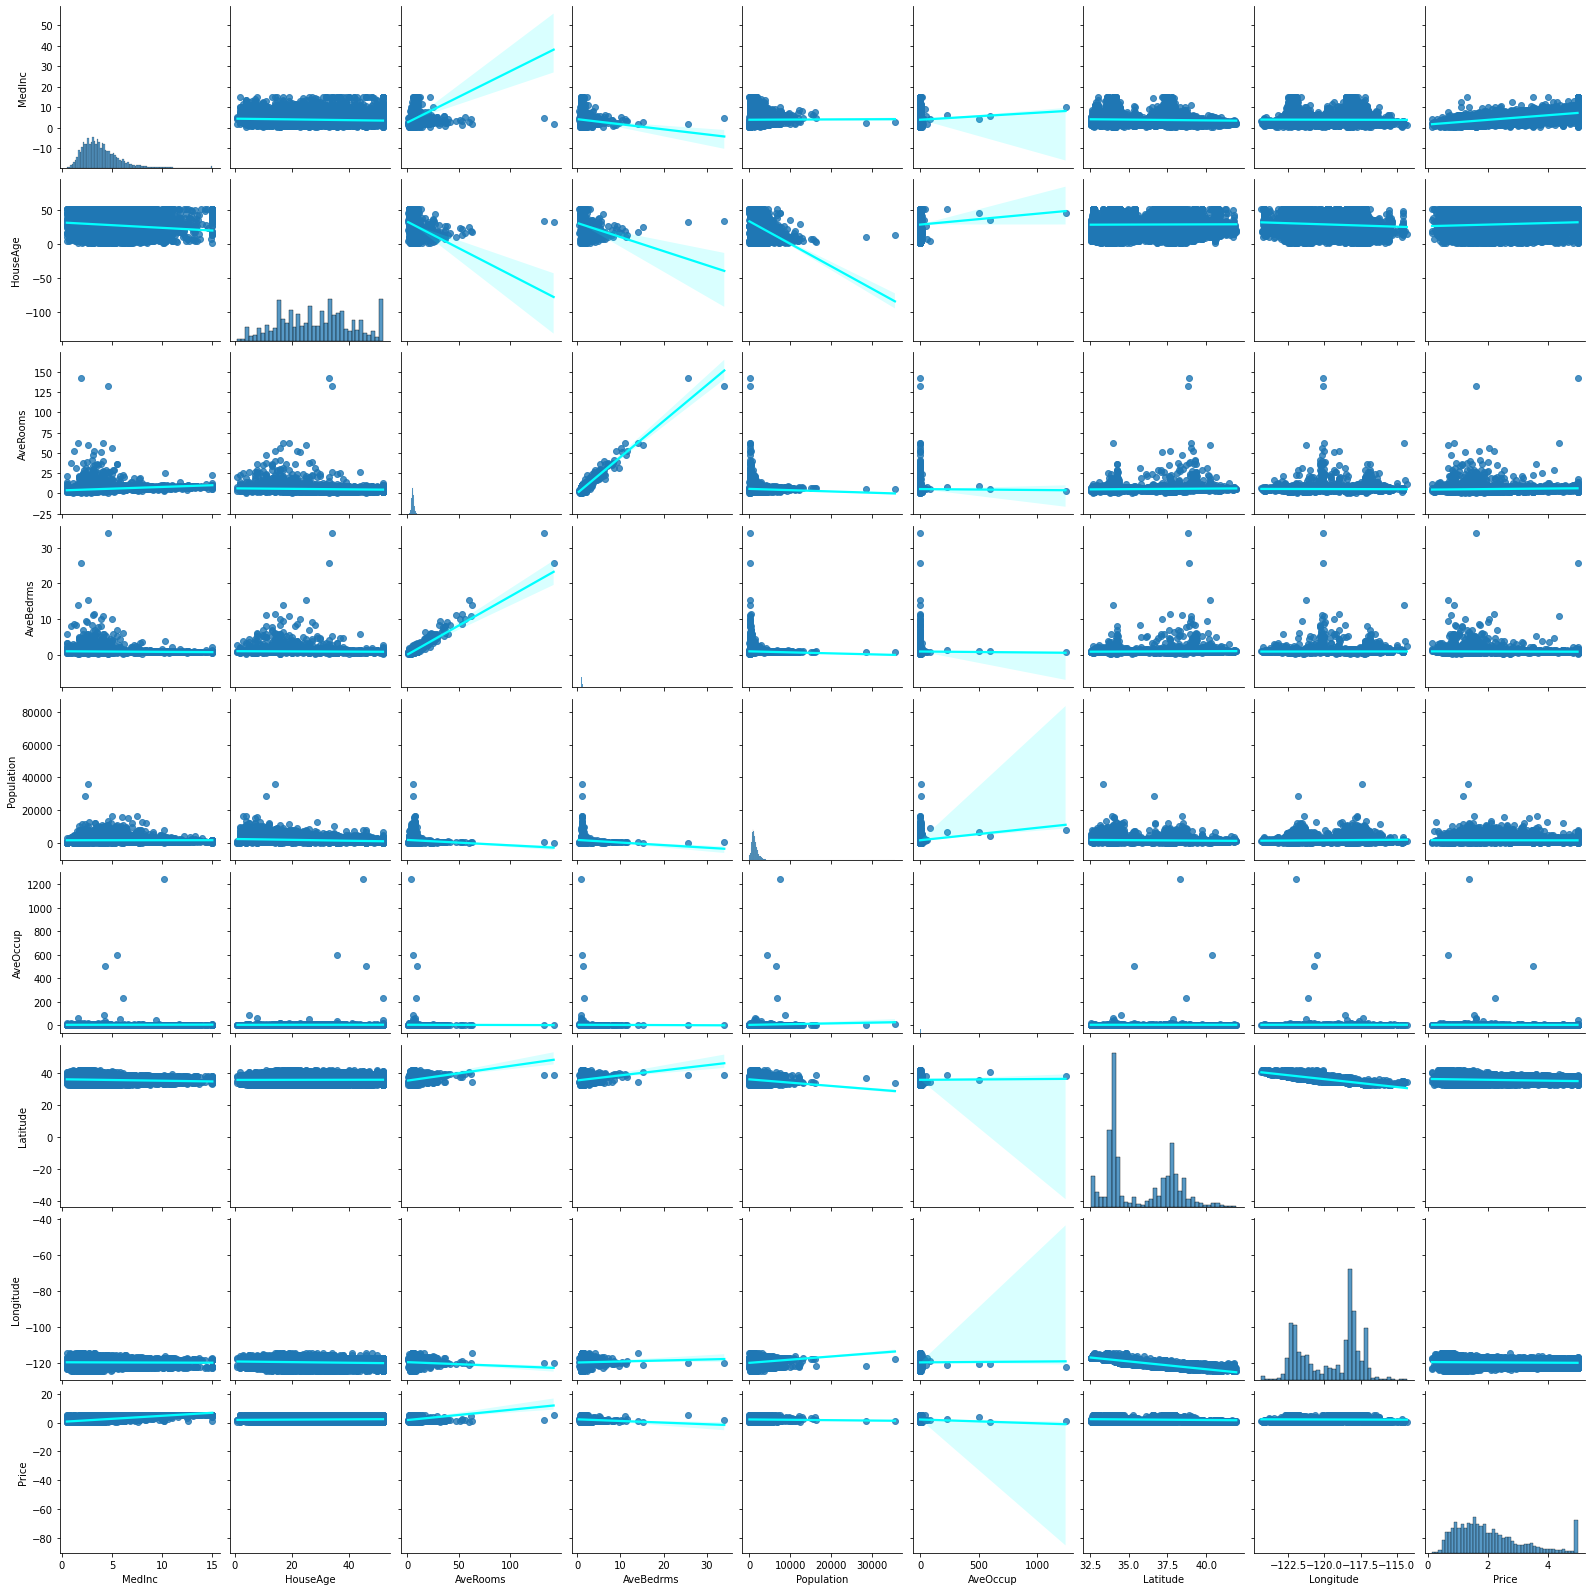

In [14]:
sns.pairplot(df, kind="reg", plot_kws={"line_kws":{"color":"cyan"}})
plt.show()

# Run Regression

In [15]:
prices = df["Price"]
features = df.drop("Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [16]:
print(len(X_train)/len(features))
print(X_test.shape[0]/features.shape[0])

0.8
0.2


In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training Data r-squared:", regr.score(X_train, y_train))
print("Test Data r-squared:", regr.score(X_test, y_test))

print("Intercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Training Data r-squared: 0.6074049305021048
Test Data r-squared: 0.6009790143129103
Intercept -37.486965765372844


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


In [18]:
df["Price"].skew()

0.9777632739098345

# Transform Data and Run Regression

In [19]:
prices = np.log(df["Price"])
features = df.drop("Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training Data r-squared:", regr.score(X_train, y_train))
print("Test Data r-squared:", regr.score(X_test, y_test))

print("Intercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Training Data r-squared: 0.6168233836099825
Test Data r-squared: 0.6037489256704882
Intercept -24.570490460846425


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


## p-values and Evaluation Coefficients

In [20]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# print(results.params)
# print(results.pvalues)

pd.DataFrame({"coef":results.params, "p-value":round(results.pvalues, 3)})

# p-value > 0.05 --> Not Significant
# p-value < 0.05 --> Significant

,coef,p-value
const,-24.570490,0.000
MedInc,0.186068,0.000
HouseAge,0.002279,0.000
AveRooms,-0.030865,0.000
AveBedrms,0.224873,0.000
Population,0.000008,0.001
AveOccup,-0.002259,0.000
Latitude,-0.289071,0.000
Longitude,-0.289146,0.000


# Testing for Multicollinearity

In [21]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=col) for col in range(len(X_incl_const.columns))]
pd.DataFrame({"coeff_name": X_incl_const.columns, 
             "vif": np.around(vif, 2)})


# VIF > 10 is problematic

,coeff_name,vif
0,const,17168.65
1,MedInc,2.47
2,HouseAge,1.24
3,AveRooms,8.87
4,AveBedrms,7.54
5,Population,1.14
6,AveOccup,1.01
7,Latitude,9.38
8,Longitude,9.04


# BIC

In [22]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

orig_coeff = pd.DataFrame({"coef":results.params, "p-value":round(results.pvalues, 3)})

print("BIC:", results.bic)
print("R-Squared:", results.rsquared)

BIC: 12467.657146183048
R-Squared: 0.6168233836099826


In [23]:
# BIC excluding AveRooms
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["AveRooms"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coeff_minus_AveRooms = pd.DataFrame({"coef":results.params, "p-value":round(results.pvalues, 3)})

print("BIC:", results.bic)
print("R-Squared:", results.rsquared)

BIC: 12554.1010165436
R-Squared: 0.6145854893817502


In [24]:
# BIC excluding AveRooms, AveBedrms
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["AveRooms", "AveBedrms"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coeff_minus_AveRooms = pd.DataFrame({"coef":results.params, "p-value":round(results.pvalues, 3)})

print("BIC:", results.bic)
print("R-Squared:", results.rsquared)

BIC: 12788.297977558224
R-Squared: 0.6088500404095492


## Residuals and residual plots

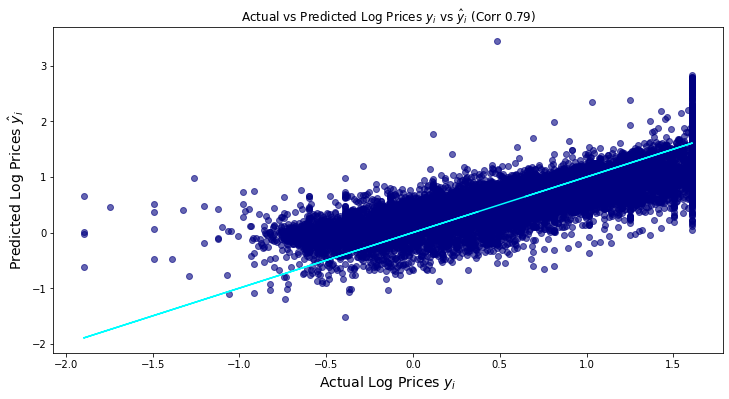

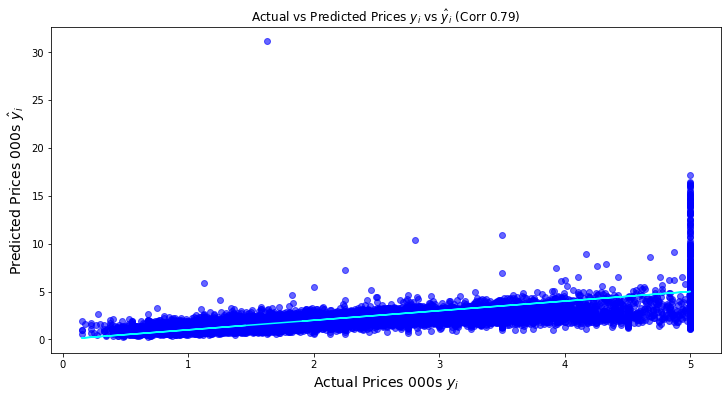

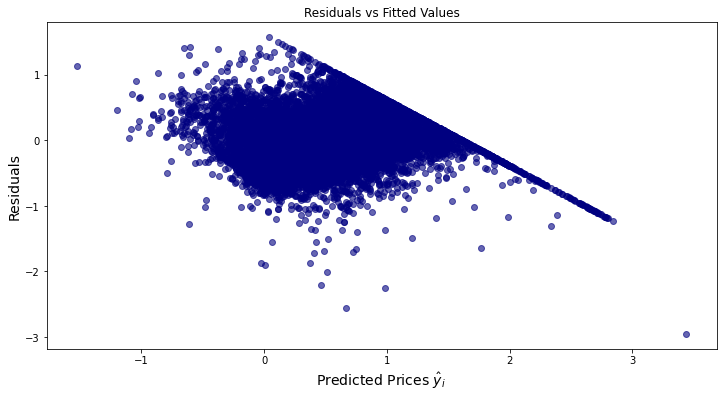

In [25]:
prices = np.log(df["Price"])
features = df.drop(["Price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using StatsModel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(12,6))
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.xlabel("Actual Log Prices $y _i $", fontsize=14)
plt.ylabel("Predicted Log Prices $\hat y _i$", fontsize=14)
plt.title(f"Actual vs Predicted Log Prices $y _i$ vs $\hat y _i$ (Corr {corr})")
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="blue", alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color="cyan")
plt.xlabel("Actual Prices 000s $y _i $", fontsize=14)
plt.ylabel("Predicted Prices 000s $\hat y _i$", fontsize=14)
plt.title(f"Actual vs Predicted Prices $y _i$ vs $\hat y _i$ (Corr {corr})")
plt.show()


# Residuals vs Predicted Values

plt.figure(figsize=(12,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.6)

plt.xlabel("Predicted Prices $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title("Residuals vs Fitted Values")
plt.show()

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


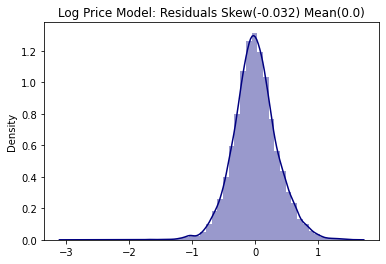

In [26]:
# Distribution of Residuals (Log Prices) - Checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color="navy")
plt.title(f"Log Price Model: Residuals Skew({resid_skew}) Mean({resid_mean})")
plt.show()

In [27]:
pd.DataFrame({"R-Squared": [reduced_log_rsquared],
             "MSE": [reduced_log_mse], 
             "RMSE": np.sqrt([reduced_log_mse])},
             index=["Reduced Log Model"])

,R-Squared,MSE,RMSE
Reduced Log Model,0.617,0.124,0.352136


In [28]:
print("1 Standard Deviation in Log Prices is", np.sqrt(reduced_log_mse))
print("2 Standard Deviation in Log Prices is", 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print("The upper bound in log prices for a 95% prediction interval is", upper_bound)
print("The upper bound in normal prices for a 95% prediction interval is $", np.e**upper_bound * 100000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print("The lower bound in log prices for a 95% prediction interval is", lower_bound)
print("The lower bound in normal prices for a 95% prediction interval is $", np.e**lower_bound * 100000)

1 Standard Deviation in Log Prices is 0.35213633723318016
2 Standard Deviation in Log Prices is 0.7042726744663603
The upper bound in log prices for a 95% prediction interval is 4.105470056128516
The upper bound in normal prices for a 95% prediction interval is $ 6067125.674197146
The lower bound in log prices for a 95% prediction interval is 2.6969247071957954
The lower bound in normal prices for a 95% prediction interval is $ 1483404.2482877949
